In [1]:
import os
import pandas as pd
from scipy.stats import mannwhitneyu
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw'
# sumPath = '/Volumes/genie/Jihong_GENIE_stuff/ufGCaMP'
sumPath = '/Users/zhengj10/Desktop/Recent data/simul_IPSC_imaging'

In [6]:
imgFile = imgPath+'/2021.02.18_000/plate_000/patch_attempt_0011_000/camera_clamp1_000/000/Clamp1.ma'
imgData = h5py.File(imgFile,'r')
imgData = imgData['data'][()]
print(imgData.shape)

(3, 1200000)


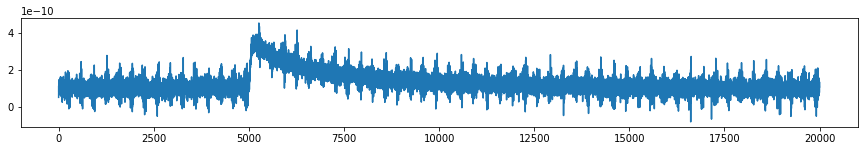

In [17]:
plt.figure(figsize=[15,2])
plt.plot(imgData[1][360000:380000])

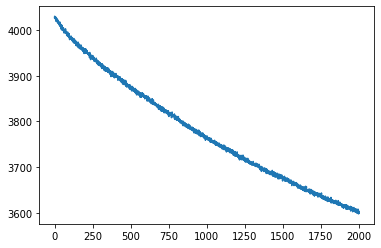

In [5]:
F = []
for i in range(2000):
    f = np.mean(imgData[i,234:274,234:274])
    F.append(f)
plt.plot(F)

In [3]:
df = pd.read_excel(sumPath+'/summary.xlsx')

2021.02.19_000 plate_000 patch_attempt_0000_001
2021.02.19_000 plate_000 patch_attempt_0002_000
2021.02.19_000 plate_000 patch_attempt_0003_000
2021.02.19_000 plate_000 patch_attempt_0005_000
2021.02.19_000 plate_000 patch_attempt_0006_000
2021.02.19_000 plate_000 patch_attempt_0009_000
2021.02.19_000 plate_000 patch_attempt_0011_000
2021.02.19_000 plate_001 patch_attempt_0013_000
2021.02.19_000 plate_002 patch_attempt_0034_000
2021.02.19_000 plate_002 patch_attempt_0037_000
2021.02.19_001 plate_001 patch_attempt_0017_000
2021.02.19_001 plate_001 patch_attempt_0021_000
2021.02.20_000 plate_000 patch_attempt_0001_000
2021.02.20_000 plate_000 patch_attempt_0005_000
2021.02.20_000 plate_001 patch_attempt_0009_000
2021.02.20_000 plate_001 patch_attempt_0013_000
2021.02.20_000 plate_001 patch_attempt_0015_000
2021.02.20_000 plate_001 patch_attempt_0016_000
2021.02.20_000 plate_001 patch_attempt_0017_000
2021.02.20_000 plate_001 patch_attempt_0018_000
2021.02.20_000 plate_001 patch_attempt_0

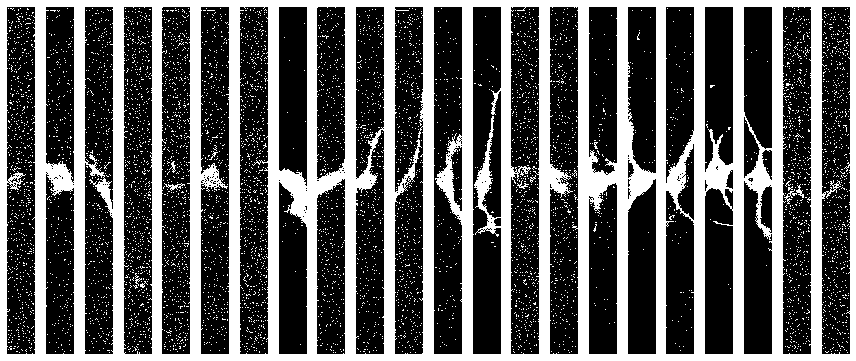

In [17]:
plt.figure(figsize=[12,10])
dFF_all = []
for i,r in df.iterrows():
    print(r['Date'],r['Plate'],r['Cell'])
    imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'I_clamp1_000/000/Camera/frames.ma')
        
    imgData = h5py.File(imgData,'r')
    imgData = imgData['data'][()]
    
    p_val = []
    for row in range(imgData.shape[1]):
        for c in range(imgData.shape[2]):
            a = imgData[50:150,row,c]
            b = imgData[200:300,row,c]
            stat, p = mannwhitneyu(a, b, alternative='two-sided')
            p_val.append(p)
            
    p_val_2d = np.reshape(p_val,[imgData.shape[1],imgData.shape[2]])
    thre = sorted(p_val)[2000]
    mask = p_val_2d<thre
    ax = plt.subplot(1,22,i+1)
    ax.imshow(mask,cmap='gray')
    ax.axis('off')
  
#     dff_single_cell = []
#     for trial in range(9):
#         if r['V_step_order'] == 'pos to neg':
#             imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000',str(8-trial).zfill(3),'Camera/frames.ma')
#         else:
#             imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000',str(trial).zfill(3),'Camera/frames.ma')

#         imgData = h5py.File(imgData,'r')
#         imgData = imgData['data'][()]
        
#         f_single_trial = []
#         for frame in range(imgData.shape[0]):
#             act_pix = imgData[frame,:,:]*mask
#             f_single_frame = np.sum(act_pix)/np.sum(mask)
#             f_single_trial.append(f_single_frame)
#         imgMean = np.mean(imgData,axis=0)
#         imgMean = imgMean.flatten()
#         fb = sorted(imgMean)[int(imgMean.shape[0]*0.8)]
#         dff_single_trial = get_dff(f_single_trial,fb)
#         dff_single_cell.append(dff_single_trial)
#     dFF_all.append(dff_single_cell)

#     F_all = []
#     for frame in range(imgData.shape[0]):
#         F = np.mean(imgData[frame,240:272,:])
#         F_all.append(F)
#     ax = plt.subplot(6,5,i+1)
#     ax.plot(F_all[:1700])

plt.tight_layout()
# plt.savefig(sumPath+'mask.png')
plt.show()
